# Pet Prediction

## Introduction

It happens more often than not - especially to animal & pet lovers such as myself - that you come across the most beautiful dog while going for a walk in the park -- or whenever you're mindlessly scrolling Facebook for hours. This project is a digitalised manifestation of your gung ho dog breed connoisseur from around the corner. How? Through the means of **Machine Learning** (ML).
The vast majority of blood, sweat and tears spent on researching and implementing the trained model will be documented by the use of the **Jupyter Notebook** you're currently reading.
Nevertheless, to take into account the target audience and pragmatism of this implementation, I have chosen to pair the aforementioned notebook with a frontend developed in React in order to evade the convoluted process of having to manually import images into the model -- which is still an option if you're into self-loathing.

## Imports

Your usual myriad of ML libraries were imported in this project such as:
- Numpy (Arrays & matrices) 
- Pandas (Manage the arrays)
- OS (Communication between your filesystem and python)
- Matplotlib (Plotting graphs)
- Tensorflow & Keras (Machine Learning)

Other than these I have also imported some lesser known libraries, and modules especially, to adapt to the specific circumstances of this project. These being:
- Preprocessing.image (Loading in images and transforming them into tensors)
- Sklearn.metrics (Visualising & reporting the model's performance & efficiency)
- Tensorflowjs (Exporting to a Javascript compatible model)

In [15]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
import tensorflowjs as tfjs
from tensorflow import keras

## Setup

In order to adhere to coding conventions and to avoid confusion further on in the project I have tactically split up the setup part of my code in order clarify some decisions I've made that other developers might not inherently also chose to do.
The most notable section is the mapping section where I list every breed conform to the alphabetically stored folders with their correspondent names.

In [16]:
TRAIN = 'breeds/TRAIN'
TEST = 'breeds/TEST'
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
EPOCH_CNT = 3

dataset=[] 
name=[]
count=0
pet_dict=[]

Name = os.listdir(TRAIN)
N=list(range(len(Name)))
mapping = dict(zip(Name, N))
reverse_mapping = dict(zip(N, Name))

print(mapping)

{'wheaten_terrier': 0, 'great_pyrenees': 1, 'sphynx': 2, 'american_bulldog': 3, 'birman': 4, 'pomeranian': 5, 'american_pit_bull_terrier': 6, 'british_shorthair': 7, 'yorkshire_terrier': 8, 'japanese_chin': 9, 'english_cocker_spaniel': 10, 'miniature_pinscher': 11, 'basset_hound': 12, 'saint_bernard': 13, 'ragdoll': 14, 'chihuahua': 15, 'abyssinian': 16, 'newfoundland': 17, 'pug': 18, 'russian_blue': 19, 'siamese': 20, 'havanese': 21, 'bengal': 22, 'beagle': 23, 'german_shorthaired': 24, 'bombay': 25, 'staffordshire_bull_terrier': 26, 'samoyed': 27, 'scottish_terrier': 28, 'egyptian_mau': 29, 'leonberger': 30, 'maine_coon': 31, 'persian': 32, 'keeshond': 33, 'boxer': 34, 'english_setter': 35, 'shiba_inu': 36}


## Data Cleaning & Processing



As this project is almost entirely image based there quite simply isn't a lot of cleaning, imputation or processing to be done.

In [17]:

for file in sorted(os.listdir(TRAIN)):
    path=os.path.join(TRAIN,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(IMAGE_HEIGHT,IMAGE_WIDTH))
        image=img_to_array(image)
        image=image/255.0
        dataset.append([image,count])     
    count=count+1
test=[]
testfile=[]

for file in os.listdir(TEST):
    path=os.path.join(TEST,file)
    image=load_img(path, grayscale=False, color_mode='rgb', target_size=(IMAGE_HEIGHT,IMAGE_WIDTH))
    image=img_to_array(image)
    image=image/255.0
    test+=[image]
    testfile+=[file]
data,labels0=zip(*dataset)
labels1=to_categorical(labels0)
labels=np.array(labels1)
data=np.array(data)
test=np.array(test)
data2=data.reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,3)
test2=test.reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,3)
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(4712, 256, 256, 3)
(1178, 256, 256, 3)
(4712, 37)
(1178, 37)


## Training Model

In order to actually train the algorithm we'll make use of [**Densely Connected Convolutional Networks**](https://arxiv.org/abs/1608.06993) (DCCN). To go about this in a comprehensive and easy to use manner, we'll be implementing said DCCN using a Keras module which we've imported in one of the former stages of this document. 

In [18]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                             width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

pretrained_model = tf.keras.applications.DenseNet121(input_shape=(
    IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, weights='imagenet', pooling='avg')

pretrained_model.trainable = False

inputs = pretrained_model.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(37, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

his = model.fit(datagen.flow(trainx, trainy, batch_size=32),
                validation_data=(testx, testy), epochs=EPOCH_CNT)

Epoch 1/3


2021-11-18 17:00:27.709782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - ETA: 0s - loss: 2.1349 - accuracy: 0.4291

2021-11-18 17:01:12.537380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - 55s 338ms/step - loss: 2.1349 - accuracy: 0.4291 - val_loss: 0.7857 - val_accuracy: 0.7691
Epoch 2/3
148/148 [==============================] - 39s 262ms/step - loss: 1.0246 - accuracy: 0.6919 - val_loss: 0.5298 - val_accuracy: 0.8447
Epoch 3/3
148/148 [==============================] - 42s 280ms/step - loss: 0.8060 - accuracy: 0.7549 - val_loss: 0.4707 - val_accuracy: 0.8396


## Model Fitness

In order to fathom the efficiency and as to how our newly born model performs we will be using a couple of built-in modules and functions from the Sklearn package. 
Previously the trained model is stored in the "his" variable. After going through the various learning cycles its accuracy and loss data are then stored in sepperate new variables and are then plotted in the next section. 

In [19]:
y_pred = model.predict(testx)
pred = np.argmax(y_pred, axis=1)
ground = np.argmax(testy, axis=1)
print(classification_report(ground, pred))

get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

2021-11-18 17:02:41.987657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.93      0.59      0.72        22
           1       0.73      0.73      0.73        33
           2       0.58      0.62      0.60        29
           3       0.89      0.77      0.83        31
           4       0.83      0.89      0.86        27
           5       0.80      0.89      0.84        36
           6       0.57      0.97      0.72        40
           7       0.75      0.97      0.85        31
           8       0.71      0.88      0.79        40
           9       0.80      0.67      0.73        30
          10       1.00      0.65      0.78        31
          11       0.84      0.87      0.86        31
          12       0.74      0.89      0.81        28
          13       0.92      0.94      0.93        35
          14       1.00      0.71      0.83        35
          15       0.97      0.94      0.96        34
          16       0.90      0.85      0.88        33
          17       0.97    

## Accuracy

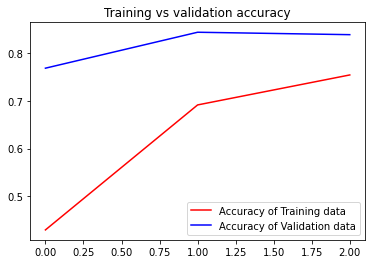

<Figure size 432x288 with 0 Axes>

In [20]:
epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

## Loss

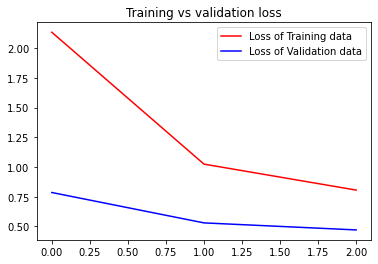

<Figure size 432x288 with 0 Axes>

In [21]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Proof testing

This section is quite possibly the most gratifying part of this entire project. Sometimes at least. 
Firstly, we declare the reverse mapping of breeds (see #Setup) to then map the different representations of breeds - using integers - to their respective indeces. A random is then loaded in and passed to the model.

In [25]:
image=load_img("breeds/TRAIN/beagle/104.jpg",target_size=(256,256))
image

model = keras.models.load_model('models/model1.h5')


image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

def mapper(value):
    return reverse_mapping[value]

## Prediction

In [26]:
# PREDICTION
print(prediction_image)
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print(f"Prediction is {format(move_name).capitalize()}.")

[[[[0.5176471  0.47058824 0.4862745 ]
   [0.5058824  0.48235294 0.49019608]
   [0.49803922 0.4745098  0.48235294]
   ...
   [0.14117648 0.09411765 0.09411765]
   [0.12941177 0.08235294 0.08235294]
   [0.13725491 0.09019608 0.09019608]]

  [[0.5254902  0.47843137 0.49411765]
   [0.5019608  0.47843137 0.4862745 ]
   [0.4862745  0.4627451  0.47058824]
   ...
   [0.14117648 0.09803922 0.09019608]
   [0.14117648 0.09411765 0.09411765]
   [0.12941177 0.08235294 0.08235294]]

  [[0.52156866 0.4745098  0.49019608]
   [0.49019608 0.46666667 0.4745098 ]
   [0.49019608 0.46666667 0.4745098 ]
   ...
   [0.14117648 0.09803922 0.08235294]
   [0.14117648 0.09803922 0.08235294]
   [0.10588235 0.0627451  0.04705882]]

  ...

  [[0.40784314 0.4117647  0.42745098]
   [0.3764706  0.36862746 0.37254903]
   [0.32156864 0.29411766 0.32156864]
   ...
   [0.8392157  0.85882354 0.87058824]
   [0.84705883 0.8666667  0.8784314 ]
   [0.8392157  0.85490197 0.8901961 ]]

  [[0.3019608  0.29803923 0.28235295]
   [0.2

2021-11-18 17:03:37.271682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Prediction is Beagle.


## Serialisation

In order to make use of the functionality of the model it will be serialised as well as converted into a model which is able to be interpreted by the aforementioned React app. The TensorflowJS converter module will split up the model into one model.json as well as various weight files which will add their respective weights to the breeds. After this is done and dusted it is ready to be pushed straight to github in order for the raw model.json file to receive GET-requests.

In [27]:
#Uncomment to save model & to export it to a tsjs compatible format.
with open('frontend/src/data/mapping.json', 'w') as mapping:
    json.dump(reverse_mapping, mapping)

model.save('models/model1.h5')
tfjs.converters.save_keras_model(model, 'models/tfjs')

NameError: name 'json' is not defined

## Conclusion

## Bronvermelding